<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/week-7/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/computer-vision)

## Data Augmentation##

**Data augmentation** is a technique used in machine learning and deep learning to increase the diversity of training datasets without actually collecting new data. It involves applying various transformations to the existing data, particularly in image, audio, or text formats, to create modified versions of the original data. This helps improve the performance of models by providing them with more varied examples to learn from, which can lead to better generalization and reduced overfitting.

Common methods of data augmentation include:

* Flipping: Mirroring the image horizontally or vertically.
* Rotation: Rotating the image by a certain angle.
* Scaling: Resizing the image.
* Cropping: Taking a random section of the image.
* Color Adjustment: Modifying brightness, contrast, saturation, or hue.
* Noise Addition: Adding random noise to the image.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Oct 28 14:43:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Import all the necessary libraries for this project, including TensorFlow for the main framework, Matplotlib for visualization, scikit-learn (sklearn.metrics) for evaluation, NumPy for data manipulation, and itertools for iterating through the data.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

# Load, split, and process the data

The **CIFAR-10** dataset, developed by the Canadian Institute For Advanced Research, is a widely used resource in computer vision and machine learning. It comprises 60,000 small, 32x32-pixel *RGB* images categorized into ten balanced classes, including objects like airplanes, cats, and ships. The dataset is divided into a training set with 50,000 images and a test set containing 10,000 images. **CIFAR-10** is a popular choice for educational purposes and research as it is suitable for tasks like image classification, enabling the training and evaluation of machine learning models while offering an ideal starting point for learning about computer vision and deep learning techniques.

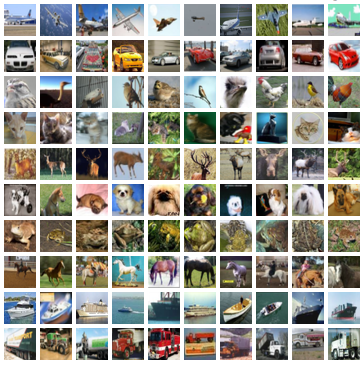

Source: https://www.kaggle.com/c/cifar-10/

Load in the data
Split it into train and test sets
Transform input values to [0 , 1].

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)
K = len(set(y_train))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


# Build the model

The model is structured as a **Convolutional Neural Network (CNN)**, consisting of a sequence of Conv2D layers: Conv2D(32, (3, 3)) x Conv2D(32, (3, 3)) x Conv2D(32, (3, 3)), and Dense layers, one with 1024 units and the other with K units representing the output classes. ReLU serves as the activation function within the hidden layers, while softmax is used in the output layer. In simple terms, the first to the last layers together act as a high-dimensional feature extractor for the model.

You can use various layer types to design a CNN model in TensorFlow. Some of the commonly used layers include:

*   Input layer: It's a fundamental layer for specifying the shape and type of input data. The Input layer is typically the first layer of your neural network model.
*   GlobalAveragePooling2D Layer: This layer calculates the average of each feature map and reduces the spatial dimensions to 1x1. It's often used in image classification tasks.
*   Conv2D Layer: This layer performs 2D convolution on the input data. It is used to extract features from the input image. You can specify the number of filters, filter size, activation function, and other parameters.
*   MaxPooling2D Layer: Max-pooling is used for downsampling feature maps. It helps reduce the spatial dimensions, which can lead to faster training and less computational complexity.
*   Dense Layer (Fully Connected Layer): It connects each neuron in one layer to every neuron in the next layer. You can define the number of units (neurons) and activation functions in this layer.
*   Dropout Layer: It helps prevent overfitting by randomly setting a fraction of input units to 0 during training.
*   Activation Layer: This layer applies an activation function to the output of the previous layer.
*   BatchNormalization Layer: It normalizes the activations of the previous layer to make training more stable and efficient.
*   Flatten Layer: It reshapes the input data to a one-dimensional tensor, which is often used before transitioning from convolutional layers to fully connected layers.

*Note: The specific layers you choose and their configurations depend on the nature of your problem and your network architecture. You can stack these layers together to create a cnn model.*

*Note: The activation function in the final layer of your neural network should be chosen according to the nature of your problem. For regression tasks, a linear activation function is typically used. In the case of binary classification, the sigmoid activation function is commonly employed. For multiclass classification problems, the softmax activation function is a suitable choice.*

*Note: Unlike feedforward neural networks, convolutional neural networks (CNNs) do not require you to flatten the input data since convolutional layers accept a 2-dimensional format. This results in a significant reduction in the number of parameters used in the network.*

Source: https://www.tensorflow.org/

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compile the model

In TensorFlow, when compiling a model, you typically specify an optimizer, a loss function, and one or more metrics. Here are some commonly used optimizers, loss functions, and metrics:

**Optimizers**:
*   SGD (Stochastic Gradient Descent): Classic optimization algorithm.
*   Adam: A popular adaptive learning rate optimization algorithm.
*   RMSprop: Another adaptive learning rate optimization algorithm.
*   Adagrad: Adapts the learning rates individually for each parameter.


**Loss Functions**:
*   Mean Squared Error (MSE): Commonly used for regression problems.
*   Binary Cross-Entropy: Used for binary classification tasks.
*   Categorical Cross-Entropy: Suitable for multiclass classification.
*   Sparse Categorical Cross-Entropy: Used when your targets are integers (e.g., class indices).
*   Kullback-Leibler Divergence (KLD): Used in variational autoencoders and other probabilistic models.

**Metrics**:
*   Accuracy: Commonly used for classification tasks.
*   Precision: Measures the true positive rate in binary classification.
*   Recall: Measures the ability to find all relevant instances in binary classification.
*   F1 Score: Combines precision and recall into a single metric.
*   Mean Absolute Error (MAE): Useful for regression problems.
*   Mean Squared Error (MSE): Another metric for regression tasks.
*   Categorical Accuracy: Used for multiclass classification.

*You can choose the appropriate optimizer, loss function, and metrics based on your specific task and model architecture.*

Source: https://www.tensorflow.org/

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

The tensorflow.keras.models.Model.fit function accepts various parameters to configure the training of a neural network model. Some of the most commonly used parameters include:
*   x: The input data, usually as a NumPy array or a TensorFlow tensor.
*   y: The target data (labels) that the model is learning to predict.
*   batch_size: The number of samples per gradient update.
*   epochs: The number of training iterations over the entire dataset.
*   validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
*   callbacks: A list of callback objects that perform actions at various stages during training.
*   verbose: Verbosity mode (0, 1, or 2) controlling the amount of information printed during training.
*   shuffle: A boolean indicating whether to shuffle the training data before each epoch.
*   initial_epoch: The epoch at which to start training (useful for resuming a previous training session).
*   steps_per_epoch: The number of batches to draw from the generator at each epoch.
*   validation_steps: The number of batches to draw from the generator for validation.

There are additional parameters for more advanced use cases, such as class weight, sample weight, and more, but the above list covers the basic parameters for training a model. You can refer to the TensorFlow documentation for more details and specific parameter options.

Source: https://www.tensorflow.org/

**[ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)**

is a class in TensorFlow that helps with image data augmentation and preprocessing for deep learning models. This class allows you to easily generate batches of tensor image data with real-time data augmentation.

Here are some key features and functionalities of ImageDataGenerator:

* Real-time Data Augmentation: It can perform various image transformations such as rotation, zoom, shear, flips, brightness adjustment, and more, on-the-fly as images are fed into the model during training. This helps to increase the diversity of your training dataset and improve the model's generalization.

* Image Normalization: It can normalize pixel values, which is often required for effective training of neural networks.

* Flow from Directory: You can use it to load images from a directory structure, making it easier to work with datasets organized into subfolders for each class.

* Flow from Numpy Arrays: It allows you to directly feed images stored in NumPy arrays, which can be useful for working with smaller datasets that fit in memory.

* Flexible Parameters: The class accepts various parameters for customizing the data augmentation process, such as rotation_range, width_shift_range, height_shift_range, shear_range, zoom_range, horizontal_flip, and more.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 128
gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.2, horizontal_flip=True)
train_gen = gen.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

response = model.fit(train_gen, validation_data=(x_test, y_test), steps_per_epoch = steps_per_epoch, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 ━━━━━━━━━━━━━━━━━━━━ 44s 92ms/step - accuracy: 0.2989 - loss: 1.9024 - val_accuracy: 0.4509 - val_loss: 1.4939
Epoch 2/10
  1/390 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4141 - loss: 1.5973

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4141 - loss: 1.5973 - val_accuracy: 0.4728 - val_loss: 1.4460
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.4559 - loss: 1.5027 - val_accuracy: 0.5410 - val_loss: 1.2673
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5625 - loss: 1.3027 - val_accuracy: 0.5381 - val_loss: 1.2753
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.4993 - loss: 1.3850 - val_accuracy: 0.5601 - val_loss: 1.2117
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5000 - loss: 1.4275 - val_accuracy: 0.5699 - val_loss: 1.1973
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.5270 - loss: 1.3154 - val_accuracy: 0.5938 - val_loss: 1.1404
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5781 - loss: 1.1640 - val_accuracy: 0.5926 - val_loss: 1.1515
Epoch 9/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 77s 96ms/step - accuracy: 0.5489 - loss: 1.2557 - val_accuracy: 0.60

# Evaluate the model

Visualize the model's performance on both the training and validation datasets. The return variable from the model.fit() function contains valuable information about the model's performance throughout the training process.

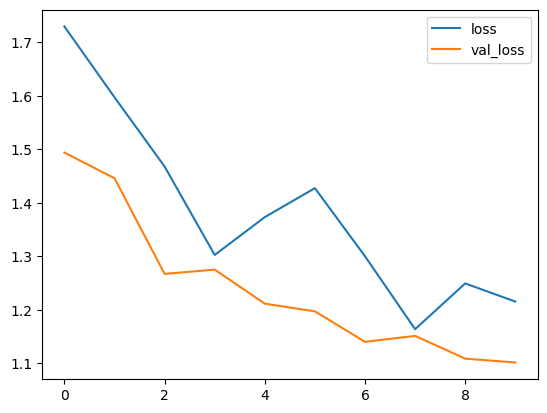

In [ ]:
plt.plot(response.history['loss'], label='loss')
plt.plot(response.history['val_loss'], label='val_loss')
plt.legend()

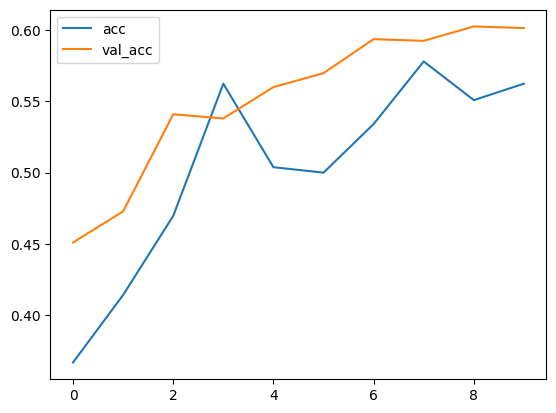

In [ ]:
# Plot accuracy per iteration
plt.plot(response.history['accuracy'], label='acc')
plt.plot(response.history['val_accuracy'], label='val_acc')
plt.legend()

This utility function plots a confusion matrix to evaluate the classification model's performance on the test dataset.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


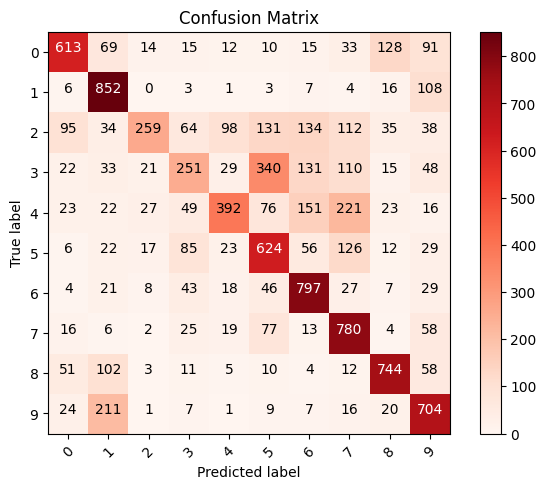

In [ ]:
def plot_metrics(cm, classes, cmap=plt.cm.Reds):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title("Confusion Matrix")
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], 'd'),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_metrics(cm, list(range(10)))

The tensorflow.keras.models.Model.evaluate() function is used to evaluate the model's performance on a given dataset, typically a test dataset. It computes and returns a set of evaluation metrics, such as accuracy, loss, or any other specified metrics, to assess how well the model is performing. The function takes the input data and corresponding target labels as arguments and computes the model's predictions on the input data. It then compares these predictions to the actual target labels to calculate the specified metrics. This provides valuable insights into the model's accuracy and performance on unseen data. The function is commonly used to assess the model's generalization capabilities and to determine whether it is ready for deployment.

In [ ]:
print(model.evaluate(x_test,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6004 - loss: 1.1021
[1.1018294095993042, 0.6015999913215637]


# Examples of Misclassification

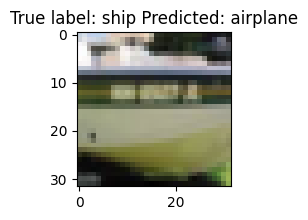

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(2, 2), dpi=100)  # You can change figsize and dpi as per your needs
plt.imshow(x_test[i], cmap='gray', interpolation='nearest')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));